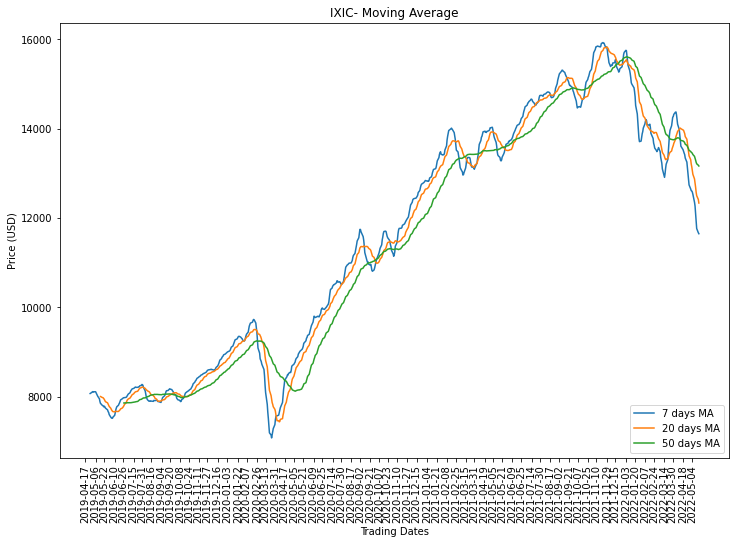

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

ticker = 'IXIC'
period1 = '2019-04-17'
period2 = '2022-05-17'

data = pd.read_json(f"http://localhost:8080/marketdata/{ticker}/byDate?startDate={period1}&endDate={period2}")
data.index = pd.Index(data.date)
data = data[['close']]

data['7day MA'] = data.close.rolling(window=7).mean()
data['20day MA'] = data.close.rolling(window=20).mean()
data['50day MA'] = data.close.rolling(window=50).mean()
data.head(500)

plt.figure(figsize=(12, 8))
plt.title(ticker + '- Moving Average')
plt.plot(data.index, data[['7day MA', '20day MA', '50day MA']])
plt.xlabel('Trading Dates')
plt.ylabel('Price (USD)')
plt.xticks(data.index[::12], rotation='vertical')
plt.legend(('7 days MA', '20 days MA', '50 days MA'), loc='lower right')
plt.show()


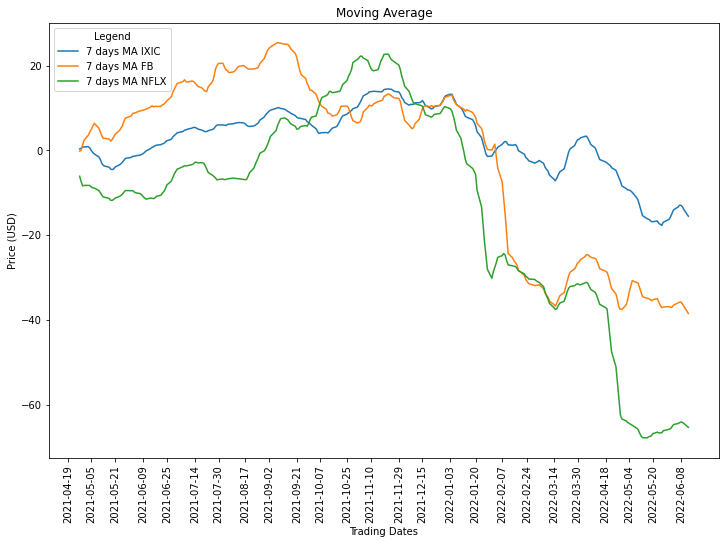

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

ticker = ['IXIC','FB','NFLX']
period1 = '2021-04-17'
period2 = '2022-06-13'

plt.figure(figsize=(12, 8))
plt.title('Moving Average')
plt.xlabel('Trading Dates')
plt.ylabel('Price (USD)')

for i in ticker:
    data = pd.read_json(f"http://localhost:8080/marketdata/{i}/byDate?startDate={period1}&endDate={period2}")
    data.index = pd.Index(data.date)
    data = data[['close']]
    data['change'] = (data.close/data.close.iloc[0] -1)*100

    data['7day MA'] = data.change.rolling(window=7).mean()
    # data['20day MA'] = data.close.rolling(window=20).mean()
    # data['50day MA'] = data.close.rolling(window=50).mean()
    data.head(500)
    
    plt.plot(data.index, data[['7day MA']], label='7 days MA ' + i)
    plt.xticks(data.index[::12], rotation='vertical')
    plt.legend(loc='upper left', title='Legend')
plt.show()


In [140]:
import pandas as pd

ticker = ['IXIC','FB','NFLX', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'GSPC']
period1 = '2021-04-17'
period2 = '2022-06-13'


frames = []
for i in ticker:
    data = pd.read_json(f"http://localhost:8080/marketdata/{i}/byDate?startDate={period1}&endDate={period2}")
    data.index = pd.Index(data.date)
    data = data[['close']]
    data['change'] = (data.close / data.close.iloc[0] - 1) * 100

    data[i] = data.change.rolling(window=7).mean()
    data = data[[i]]
    data.head(500)
    frames.append(data)
result = pd.concat(frames, axis=1, join='inner')
correlation = result.corr(method='pearson')

print(correlation)

          IXIC        FB      NFLX      MSFT      GOOG      AAPL      AMZN  \
IXIC  1.000000  0.778336  0.924746  0.712847  0.877778  0.211839  0.875950   
FB    0.778336  1.000000  0.864612  0.214123  0.476186 -0.315356  0.780115   
NFLX  0.924746  0.864612  1.000000  0.494360  0.706956 -0.098942  0.868347   
MSFT  0.712847  0.214123  0.494360  1.000000  0.893301  0.733880  0.361538   
GOOG  0.877778  0.476186  0.706956  0.893301  1.000000  0.536464  0.637970   
AAPL  0.211839 -0.315356 -0.098942  0.733880  0.536464  1.000000 -0.062253   
AMZN  0.875950  0.780115  0.868347  0.361538  0.637970 -0.062253  1.000000   
GSPC  0.864881  0.426202  0.658913  0.918746  0.933185  0.641587  0.612484   

          GSPC  
IXIC  0.864881  
FB    0.426202  
NFLX  0.658913  
MSFT  0.918746  
GOOG  0.933185  
AAPL  0.641587  
AMZN  0.612484  
GSPC  1.000000  


In [141]:
import pandas as pd

ticker = ['IXIC','FB','NFLX', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'GSPC']
period1 = '2021-04-17'
period2 = '2022-06-13'


frames = []
for i in ticker:
    data = pd.read_json(f"http://localhost:8080/marketdata/{i}/byDate?startDate={period1}&endDate={period2}")
    data.index = pd.Index(data.date)
    data = data[['close']]
    data['change'] = (data.close / data.close.iloc[0] - 1) * 100

    data[i] = data.change.rolling(window=7).mean()
    data = data[[i]]
    data.head(500)
    frames.append(data)
result = pd.concat(frames, axis=1, join='inner')
print(result)

                 IXIC         FB       NFLX      MSFT      GOOG       AAPL  \
date                                                                         
2021-04-19        NaN        NaN        NaN       NaN       NaN        NaN   
2021-04-20        NaN        NaN        NaN       NaN       NaN        NaN   
2021-04-21        NaN        NaN        NaN       NaN       NaN        NaN   
2021-04-22        NaN        NaN        NaN       NaN       NaN        NaN   
2021-04-23        NaN        NaN        NaN       NaN       NaN        NaN   
...               ...        ...        ...       ...       ...        ...   
2022-06-07 -12.966875 -35.862229 -64.304781  5.090602  0.209099  10.038354   
2022-06-08 -13.012932 -35.790857 -64.107929  4.934352  0.759953   9.860367   
2022-06-09 -13.348812 -36.246503 -64.228256  4.543447  0.869032   9.203504   
2022-06-10 -14.020699 -36.864271 -64.485143  3.470665  0.532799   7.976653   
2022-06-13 -15.568561 -38.499679 -65.397260  1.686194 -0.816041 

In [142]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import seaborn as sb

ticker = ['FB','AAPL']
period1 = '2021-06-17'
period2 = '2022-06-13'


frames = []
for i in ticker:
    data = pd.read_json(f"http://localhost:8080/marketdata/{i}/byDate?startDate={period1}&endDate={period2}")
    data.index = pd.Index(data.date)
    data = data[['close']]
    data['change'] = (data.close / data.close.iloc[0] - 1) * 100

    data[i] = data.change.rolling(window=7).mean()
    data = data[[i]]
    data.head(500)
    frames.append(data)
result = pd.concat(frames, axis=1, join='inner')
print(result)

# plt.scatter(result['IXIC'], result['NFLX'], color='red')
# plt.title('IXIC Vs FB', fontsize=14)
# plt.xlabel('IXIC', fontsize=14)
# plt.ylabel('FB', fontsize=14)
# plt.grid(True)
# # plt.show()
sb.regplot(x = result['FB'],
            y = result['AAPL'],
            ci = None,
            data = result)
plt.show()

AttributeError: module 'scipy' has no attribute '_lib'